In [1]:
import time
import numpy as np 
from scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline

# CLASS tests

In [2]:
from classy import Class
import classy
classy.__version__

'v2.9.4'

### Setup CLASS object

In [3]:
def eta_0_val(c_min):
    return 1.03-0.11*c_min

#### Takahashi cosmology (fiducial) ####
#omega_b = 0.02254 # Omega_b*h*h i.e. the physical baryon density 
#omega_cdm = 0.11417 # Omega_cdm*h*h i.e. the physical cdm density 
Omega_b = 0.046
Omega_cdm = 0.233
#Omega_cdm = 0.45-Omega_b
h = 0.7
sigma8 = 0.82
n_s = 0.97
#w_0 = -1.0
w_0 = -1.8
w_a = 0.0
c_min = 1.8
#eta_0 = 0.603 # emu_dmonly (fiducial)
eta_0 = eta_0_val(c_min)
Mv = 0.0

'''
Omega_b = 0.0448 
Omega_cdm = 0.2648 - Omega_b 
h = 0.71
sigma8 = 0.801
n_s = 0.963
Mv = 0.0
A_s = 2.165e-9
'''

omega_b = Omega_b * h * h
omega_cdm = Omega_cdm * h * h

if Mv == 0.0:
    commonsettings_nl  = {
                # The next line should be uncommented fgor higher precision (but significantly slower running)
                #'ncdm_fluid_approximation':3,
                # You may uncomment this line to get more info on the ncdm sector from Class:
                #'background_verbose':10,
                # omega_b here actually means Omega_b*h*h
                'h':h,
                'omega_b':omega_b,
                'omega_cdm': omega_cdm,
                'n_s':n_s,
                'sigma8': sigma8,
                #'A_s': A_s,
                'Omega_Lambda':0.0,
                'fluid_equation_of_state':'CLP',
                'w0_fld':w_0,
                'wa_fld':w_a,
                'output':'mPk',
                'P_k_max_1/Mpc':70,
                'z_max_pk':3.0,
                'non linear':'hmcode',
                'eta_0':eta_0,
                'c_min':c_min,
                #'write warnings':'yes'
                }


#### CLASS computation for non-linear power spectrum #####
class_start = time.time()

cclass = Class()
cclass.set(commonsettings_nl)
cclass.compute()

class_end = time.time()

print('CLASS computation time (seconds): ', class_end - class_start)

CLASS computation time (seconds):  1.868271827697754


### Background quantities

In [4]:
cclass.get_background()

{'z': array([1.00000000e+14, 9.93048659e+13, 9.86145640e+13, ...,
        1.36880249e-02, 6.58190863e-03, 0.00000000e+00]),
 'proper time [Gyr]': array([7.55850363e-26, 7.66469305e-26, 7.77237432e-26, ...,
        1.47878694e+01, 1.48865631e+01, 1.49783299e+01]),
 'conf. time [Mpc]': array([4.63478500e-09, 4.66752681e-09, 4.70026862e-09, ...,
        1.48867687e+04, 1.49173349e+04, 1.49455625e+04]),
 'H [1/Mpc]': array([2.15754595e+22, 2.12765453e+22, 2.09817724e+22, ...,
        2.32145625e-04, 2.32826803e-04, 2.33494915e-04]),
 'comov. dist.': array([14945.56250536, 14945.56250536, 14945.56250536, ...,
           58.79384145,    28.22761315,     0.        ]),
 'ang.diam.dist.': array([1.49455625e-10, 1.50501814e-10, 1.51555327e-10, ...,
        5.79999369e+01, 2.80430365e+01, 0.00000000e+00]),
 'lum. dist.': array([1.49455625e+18, 1.48416708e+18, 1.47385013e+18, ...,
        5.95986130e+01, 2.84134047e+01, 0.00000000e+00]),
 'comov.snd.hrz.': array([2.67595816e-09, 2.69468987e-09, 2.

In [5]:
cclass.get_background()['z']

array([1.00000000e+14, 9.93048659e+13, 9.86145640e+13, ...,
       1.36880249e-02, 6.58190863e-03, 0.00000000e+00])

In [6]:
cclass.get_background()['H [1/Mpc]']

array([2.15754595e+22, 2.12765453e+22, 2.09817724e+22, ...,
       2.32145625e-04, 2.32826803e-04, 2.33494915e-04])

In [7]:
cclass.get_background()['comov. dist.']

array([14945.56250536, 14945.56250536, 14945.56250536, ...,
          58.79384145,    28.22761315,     0.        ])

In [8]:
chi_z = interpolate.interp1d(cclass.get_background()['z'], cclass.get_background()['comov. dist.'], kind='cubic', fill_value=0.0)

chi_z(0.01)

array(42.91890104)

In [9]:
15000/chi_z(0.01)

349.49636728900236

### Get sigma8 and growth factor

In [10]:
cclass.sigma8()

0.8200005745276931

In [11]:
cclass.sigma_prime(8,0.2)

-0.07071830887476334

In [12]:
cclass.scale_independent_growth_factor(0.0)

1.0

In [13]:
cclass.scale_independent_growth_factor(0.3)

0.8450233766825826

### Compute matter power spectrum

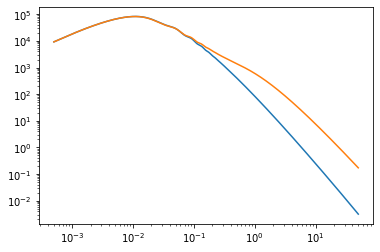

In [14]:
k_arr = np.logspace(np.log10(5e-4),np.log10(50),1000)
z_arr = np.array([0.0])

pk_arr_lin = cclass.get_pk_array(k_arr, z_arr, k_arr.size, z_arr.size, 0)
pk_arr_nl = cclass.get_pk_array(k_arr, z_arr, k_arr.size, z_arr.size, 1)

plt.plot(k_arr, pk_arr_lin)
plt.plot(k_arr, pk_arr_nl)

plt.xscale('log')
plt.yscale('log')

In [15]:
k_grid_points_ascending = k_arr
z_grid_points_ascending = np.arange(0.0, 2.5, step=0.01)

In [16]:
# get power spectrum at desired grid points

Pk_array = cclass.get_pk_array(k_grid_points_ascending, z_grid_points_ascending, k_grid_points_ascending.size, z_grid_points_ascending.size, 0).reshape(z_grid_points_ascending.size, k_grid_points_ascending.size)

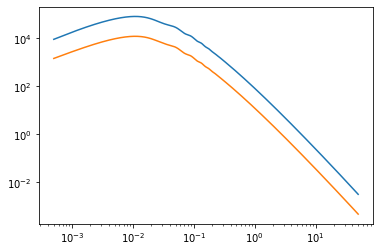

In [17]:
plt.plot(k_grid_points_ascending, Pk_array[0,:])
plt.plot(k_grid_points_ascending, Pk_array[200,:])
plt.xscale('log')
plt.yscale('log')

In [18]:
# get power spectrum on pre-computed k,z grid points internally by CLASS

cclass.get_pk_and_k_and_z()[0].shape

(133, 18)

In [19]:
# k values at which the power spectrum is computed

cclass.get_pk_and_k_and_z()[1].shape

(133,)

In [20]:
# redshifts at which the power spectrum is computed

cclass.get_pk_and_k_and_z()[2].shape

(18,)

### Compute the tilt of the matter power spectrum

In [21]:
# compute pk_tilt as a function of k and z using class built-in function

#k_arr = cclass.get_pk_and_k_and_z()[1][10:130]
k_arr = np.logspace(np.log10(5e-4),np.log10(50),200)

pk_tilt_k_z_array = np.zeros((k_arr.size,3))
pk_nonlinear_tilt_k_z_array = np.zeros((k_arr.size,3))

for i in range(k_arr.size):
    pk_tilt_k_z_array[i, 0] = cclass.pk_tilt(k_arr[i], 0)
    pk_tilt_k_z_array[i, 1] = cclass.pk_tilt(k_arr[i], 1)
    pk_tilt_k_z_array[i, 2] = cclass.pk_tilt(k_arr[i], 2)

    pk_nonlinear_tilt_k_z_array[i, 0] = cclass.pk_nonlinear_tilt(k_arr[i], 0)
    pk_nonlinear_tilt_k_z_array[i, 1] = cclass.pk_nonlinear_tilt(k_arr[i], 1)
    pk_nonlinear_tilt_k_z_array[i, 2] = cclass.pk_nonlinear_tilt(k_arr[i], 2)

In [22]:
# compute pk_tilt as a function of k and z manually using numpy gradient

pk_k_z_array = np.zeros((k_arr.size,3))
pk_nonlinear_k_z_array = np.zeros((k_arr.size,3))

pk_tilt_k_z_array_numpy_gradient = np.zeros((k_arr.size,3))
pk_nonlinear_tilt_k_z_array_numpy_gradient = np.zeros((k_arr.size,3))

for i in range(k_arr.size):
    pk_k_z_array[i, 0] = cclass.pk_lin(k_arr[i], 0)
    pk_k_z_array[i, 1] = cclass.pk_lin(k_arr[i], 1)
    pk_k_z_array[i, 2] = cclass.pk_lin(k_arr[i], 2)

    pk_nonlinear_k_z_array[i, 0] = cclass.pk(k_arr[i], 0)
    pk_nonlinear_k_z_array[i, 1] = cclass.pk(k_arr[i], 1)
    pk_nonlinear_k_z_array[i, 2] = cclass.pk(k_arr[i], 2)

pk_tilt_k_z_array_numpy_gradient[:, 0] = np.gradient(np.log(pk_k_z_array[:, 0]), np.log(k_arr))
pk_tilt_k_z_array_numpy_gradient[:, 1] = np.gradient(np.log(pk_k_z_array[:, 1]), np.log(k_arr))
pk_tilt_k_z_array_numpy_gradient[:, 2] = np.gradient(np.log(pk_k_z_array[:, 2]), np.log(k_arr))

pk_nonlinear_tilt_k_z_array_numpy_gradient[:, 0] = np.gradient(np.log(pk_nonlinear_k_z_array[:, 0]), np.log(k_arr))
pk_nonlinear_tilt_k_z_array_numpy_gradient[:, 1] = np.gradient(np.log(pk_nonlinear_k_z_array[:, 1]), np.log(k_arr))
pk_nonlinear_tilt_k_z_array_numpy_gradient[:, 2] = np.gradient(np.log(pk_nonlinear_k_z_array[:, 2]), np.log(k_arr))

Text(0.5, 1.0, 'Linear pk_tilt')

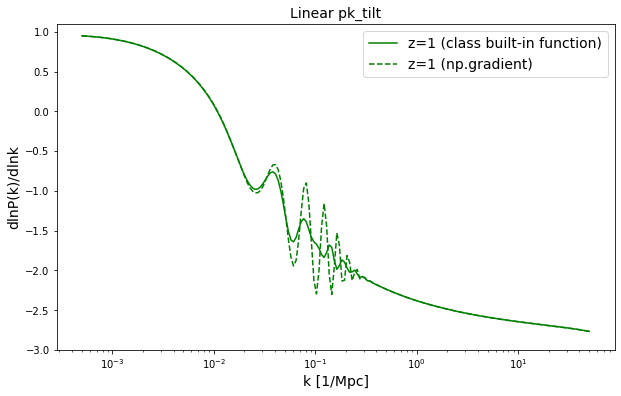

In [23]:
plt.figure(figsize=(10,6))
#plt.plot(k_arr, pk_tilt_k_z_array[:,0], c='b', ls='solid', label='z=0 (class built-in function)')
plt.plot(k_arr, pk_tilt_k_z_array[:,1], c='g', ls='solid', label='z=1 (class built-in function)')
#plt.plot(k_arr, pk_tilt_k_z_array[:,2], c='r', ls='solid', label='z=2 (class built-in function)')
#plt.plot(k_arr, pk_tilt_k_z_array_numpy_gradient[:,0], c='b', ls='dashed', label='z=0 (np.gradient)')
plt.plot(k_arr, pk_tilt_k_z_array_numpy_gradient[:,1], c='g', ls='dashed', label='z=1 (np.gradient)')
#plt.plot(k_arr, pk_tilt_k_z_array_numpy_gradient[:,2], c='r', ls='dashed', label='z=2 (np.gradient)')
plt.xscale('log')
plt.xlabel('k [1/Mpc]',fontsize=14)
plt.ylabel('dlnP(k)/dlnk',fontsize=14)
plt.ylim(-3.0,1.1)
plt.legend(fontsize=14)
plt.title('Linear pk_tilt',fontsize=14)

Text(0.5, 1.0, 'Nonlinear pk_tilt')

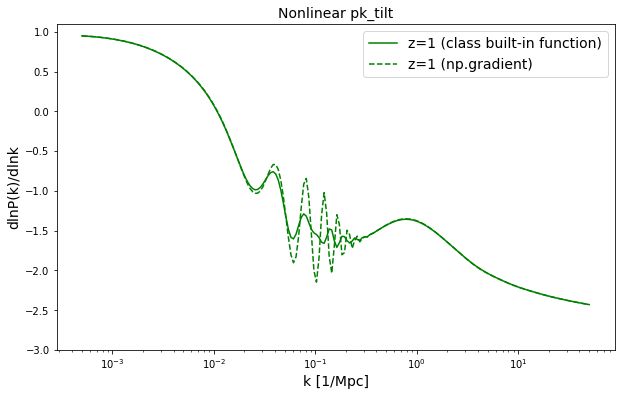

In [24]:
plt.figure(figsize=(10,6))
#plt.plot(k_arr, pk_nonlinear_tilt_k_z_array[:,0], c='b', ls='solid', label='z=0 (class built-in function)')
plt.plot(k_arr, pk_nonlinear_tilt_k_z_array[:,1], c='g', ls='solid', label='z=1 (class built-in function)')
#plt.plot(k_arr, pk_nonlinear_tilt_k_z_array[:,2], c='r', ls='solid', label='z=2 (class built-in function)')
#plt.plot(k_arr, pk_nonlinear_tilt_k_z_array_numpy_gradient[:,0], c='b', ls='dashed', label='z=0 (np.gradient)')
plt.plot(k_arr, pk_nonlinear_tilt_k_z_array_numpy_gradient[:,1], c='g', ls='dashed', label='z=1 (np.gradient)')
#plt.plot(k_arr, pk_nonlinear_tilt_k_z_array_numpy_gradient[:,2], c='r', ls='dashed', label='z=2 (np.gradient)')
plt.xscale('log')
plt.xlabel('k [1/Mpc]',fontsize=14)
plt.ylabel('dlnP(k)/dlnk',fontsize=14)
plt.ylim(-3.0,1.1)
plt.legend(fontsize=14)
plt.title('Nonlinear pk_tilt',fontsize=14)